## 线性回归

In [1]:
import numpy as np
import pandas as pd

In [2]:
### 初始化模型参数
def initialize_params(dims):
    '''
    输入：
    dims：训练数据变量维度
    输出：
    w：初始化权重参数值
    b：初始化偏差参数值
    '''
    # 初始化权重参数为零矩阵
    w = np.zeros((dims, 1))
    # 初始化偏差参数为零
    b = 0
    return w, b

In [3]:
### 定义模型主体部分
### 包括线性回归公式、均方损失和参数偏导三部分
def linear_loss(X, y, w, b):
    '''
    输入:
    X：输入变量矩阵
    y：输出标签向量
    w：变量参数权重矩阵
    b：偏差项
    输出：
    y_hat：线性模型预测输出
    loss：均方损失值
    dw：权重参数一阶偏导
    db：偏差项一阶偏导
    '''
    # 训练样本数量
    num_train = X.shape[0]
    # 训练特征数量
    num_feature = X.shape[1]
    # 线性回归预测输出
    y_hat = np.dot(X, w) + b
    # 计算预测输出与实际标签之间的均方损失
    loss = np.sum((y_hat-y)**2)/num_train
    # 基于均方损失对权重参数的一阶偏导数
    dw = np.dot(X.T, (y_hat-y)) /num_train
    # 基于均方损失对偏差项的一阶偏导数
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [4]:
### 定义线性回归模型训练过程
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his：每次迭代的均方损失
    params：优化后的参数字典
    grads：优化后的参数梯度字典
    '''
    # 记录训练损失的空列表
    loss_his = []
    # 初始化模型参数
    w, b = initialize_params(X.shape[1])
    # 迭代训练
    for i in range(1, epochs):
        # 计算当前迭代的预测值、损失和梯度
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }     
    return loss_his, params, grads

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [6]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [19]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3679.868273
epoch 20000 loss 3219.164522
epoch 30000 loss 3040.820279
epoch 40000 loss 2944.936608
epoch 50000 loss 2885.991571
epoch 60000 loss 2848.051813
epoch 70000 loss 2823.157085
epoch 80000 loss 2806.627821
epoch 90000 loss 2795.546917
epoch 100000 loss 2788.051561
epoch 110000 loss 2782.935842
epoch 120000 loss 2779.411265
epoch 130000 loss 2776.957989
epoch 140000 loss 2775.230803
epoch 150000 loss 2773.998942
epoch 160000 loss 2773.107192
epoch 170000 loss 2772.450534
epoch 180000 loss 2771.957489
epoch 190000 loss 2771.579121
{'w': array([[  10.56390075],
       [-236.41625133],
       [ 481.50915635],
       [ 294.47043558],
       [ -60.99362023],
       [-110.54181897],
       [-206.44046579],
       [ 163.23511378],
       [ 409.28971463],
       [  65.73254667]]), 'b': 150.8144748910088}


In [20]:
### 定义线性回归预测函数
def predict(X, params):
    '''
    输入：
    X：测试数据集
    params：模型训练参数
    输出：
    y_pred：模型预测结果
    '''
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
y_pred[:5]

array([[ 82.0537503 ],
       [167.22420149],
       [112.38335719],
       [138.15504748],
       [174.71840809]])

In [9]:
print(y_test[:5])

[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [14]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    '''
    输入：
    y_test：测试集标签值
    y_pred：测试集预测值
    输出：
    r2：R2系数
    '''
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [21]:
print(r2_score(y_test, y_pred))

0.5334188457463576


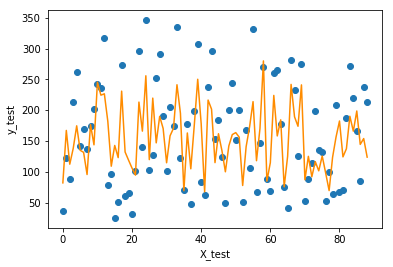

In [23]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

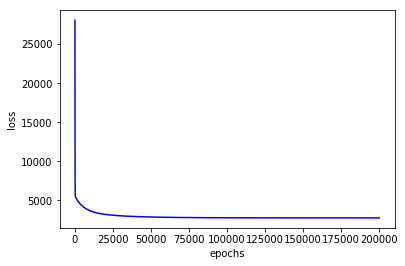

In [24]:
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [11]:
from sklearn.utils import shuffle
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
data = np.concatenate((X, y.reshape((-1,1))), axis=1)
data.shape

(442, 11)

In [36]:
from random import shuffle

def k_fold_cross_validation(items, k, randomize=True):
    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        training = np.array(training)
        validation = np.array(validation)
        yield training, validation


for training, validation in k_fold_cross_validation(data, 5): 
    X_train = training[:, :10]
    y_train = training[:, -1].reshape((-1,1))
    X_valid = validation[:, :10]
    y_valid = validation[:, -1].reshape((-1,1))
    loss5 = []
    #print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
    loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)
    loss5.append(loss)
    score = np.mean(loss5)
    print('five kold cross validation score is', score)
    y_pred = predict(X_valid, params)
    valid_score = np.sum(((y_pred-y_valid)**2))/len(X_valid)
    print('valid score is', valid_score)

(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5667.323261
epoch 20000 loss 5365.061628
epoch 30000 loss 5104.951009
epoch 40000 loss 4880.559191
epoch 50000 loss 4686.465012
epoch 60000 loss 4518.097942
epoch 70000 loss 4371.603217
epoch 80000 loss 4243.728424
epoch 90000 loss 4131.728130
five kold cross validation score is 4033.2928969313452
valid score is 3558.147428823725
(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5517.461607
epoch 20000 loss 5181.523292
epoch 30000 loss 4897.000442
epoch 40000 loss 4655.280406
epoch 50000 loss 4449.235361
epoch 60000 loss 4272.963989
epoch 70000 loss 4121.578253
epoch 80000 loss 3991.027359
epoch 90000 loss 3877.952427
five kold cross validation score is 3779.575673476155
valid score is 4389.749894361285
(354, 10) (354, 1) (88, 10) (88, 1)
epoch 10000 loss 5677.526932
epoch 20000 loss 5331.464606
epoch 30000 loss 5038.541403
epoch 40000 loss 4789.859079
epoch 50000 loss 4578.047735
epoch 60000 loss 4397.001364
epoch 70000 loss 4241

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


Coefficients: 
 [[   7.00153867 -244.27466725  488.58606379  301.83242902 -693.67792807
   364.02013146  106.15852423  289.24926974  645.158344     50.77526251]]
Mean squared error: 3371.88
Variance score: 0.54
0.5392080506325068


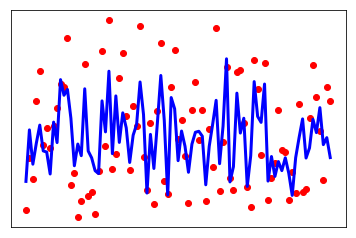

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(range(X_test.shape[0]), y_test, color='red')
plt.plot(range(X_test.shape[0]), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

In [55]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

### 交叉验证
def cross_validate(model, x, y, folds=5, repeats=5):
    
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    for r in range(repeats):
        i=0
        print('Cross Validating - Run', str(r + 1), 'out of', str(repeats))
        x,y = shuffle(x, y, random_state=r) #shuffle data before each repeat
        kf = KFold(n_splits=folds,random_state=i+1000) #random split, different each time
        for train_ind, test_ind in kf.split(x):
            print('Fold', i+1, 'out of', folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            model.fit(xtrain, ytrain)
            #print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
            ypred[test_ind]=model.predict(xtest)
            i+=1
        score[r] = R2(ypred[:,r],y)
    print('\nOverall R2:',str(score))
    print('Mean:',str(np.mean(score)))
    print('Deviation:',str(np.std(score)))
    pass

cross_validate(regr, X, y, folds=5, repeats=5)

Cross Validating - Run 1 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 2 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 3 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 4 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 5 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5

Overall R2: [-670.4095204  -671.45443974 -673.60734422 -671.40192667 -675.31208185]
Mean: -672.437062575318
Deviation: 1.77669784591671
